![](logo1.jpg)

# shAI Training 2022 | Level 1
## Task #5  (End-to-End ML Project {part_1})
***

### Welcome to the exercises for reviewing first part of end to end ML project.

**Make sure that you read and understand ch2 from the hands-on ML book (page 35 - 71) before start with this notebook.**

**If you stuck with anything reread that part from the book and feel free to ask about anything in the messenger group as you go along.**

**Good Luck : )**

***
# 1- Get the Data
***

In [64]:
import numpy as np
import pandas as pd

#### We'll work with the housing price in California dataset
#### There're 2 ways to get the data:

## First:
Download and extract the dataset in your local device from

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz

then read it using pandas method read_csv

**Read housing.csv as a dataframe called housing.**

In [65]:
#df = pd.read_csv('housing.csv')

## Second:
Write a simple function that gets the dataset directly from the website.

In [66]:
# import needed libraries
import os
import tarfile
import urllib

In [67]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = "/content/datasets/housing/housing.csv"
    return pd.read_csv(csv_path)


In [68]:
fetch_housing_data()

**Use load_housing_data to create dataframe called housing.**

In [69]:
housing = load_housing_data()

***
# 2- Discover and visualize the data
***

## A- Data discovery

**Check the head of housing, and check out its info() and describe() methods.**

#### 1-Let’s take a look at the top five rows using the DataFrame’s head() method

In [70]:
# CODE HERE

In [71]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 2-Use the info() method to get a quick description of the data

In [72]:
# CODE HERE

In [73]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 3-Let's take a look at how many districts belong to "ocean_proximity" by using the value_counts() method

In [74]:
# CODE HERE

In [75]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### 4-Let’s look at the summary of the numerical attributes . Using the describe() method

In [76]:
# CODE HERE

In [77]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## B- Data visualization

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Create a hist plot for housing dataframe as shown down

In [79]:
# CODE HERE

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

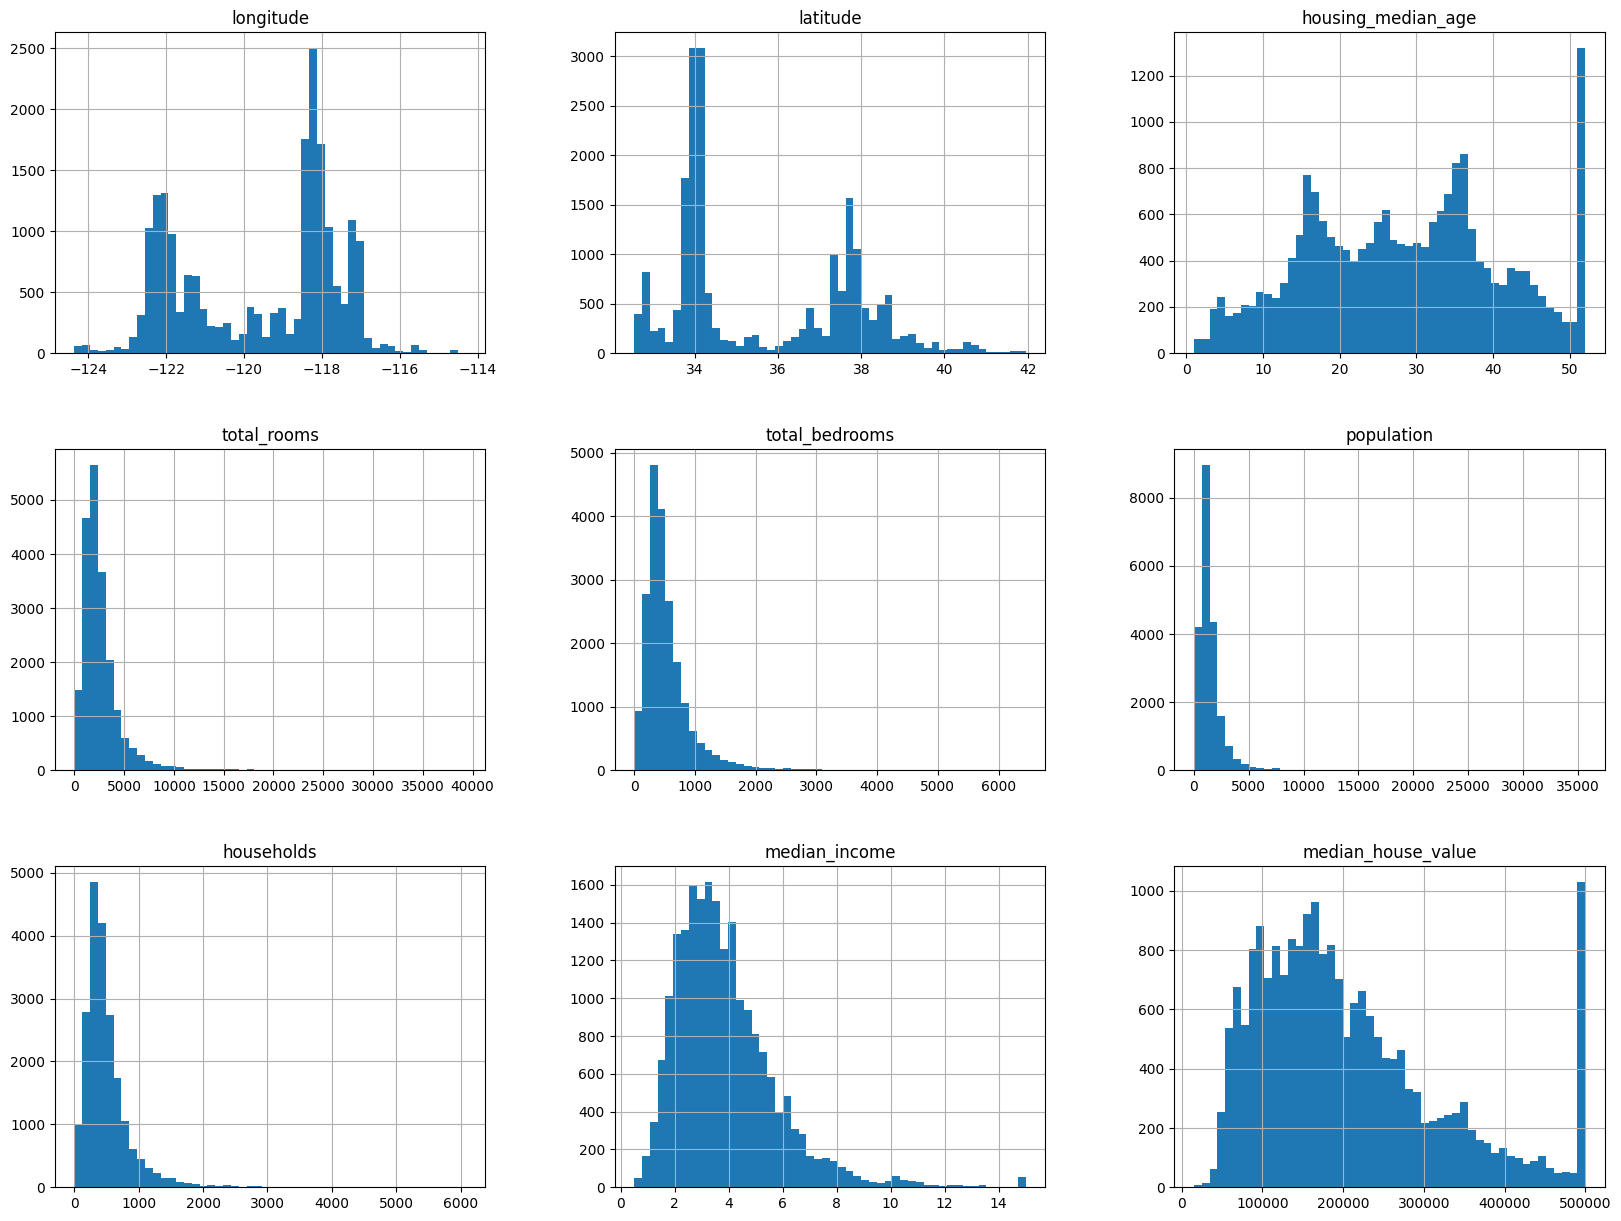

In [80]:
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize=(20,15))

#### Create a scatter plot between "longitude" in x axis and "latitude" in y axis with alpha = 0.1

In [81]:
# CODE HERE

<Axes: xlabel='longitude', ylabel='latitude'>

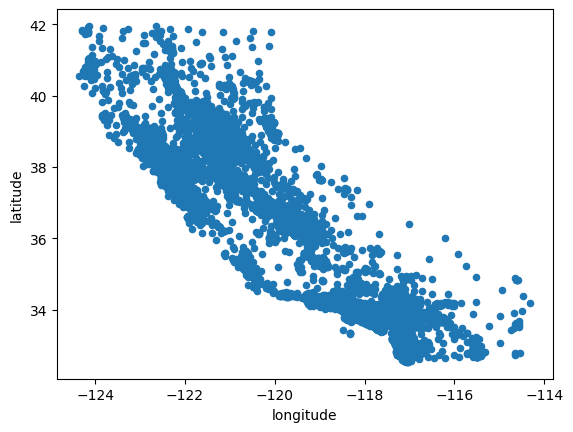

In [82]:
housing.plot(kind="scatter", x="longitude", y="latitude")

#### Make The radius of each circle represent the district’s population (option s), and the color represents the price (option c).

In [83]:
# CODE HERE

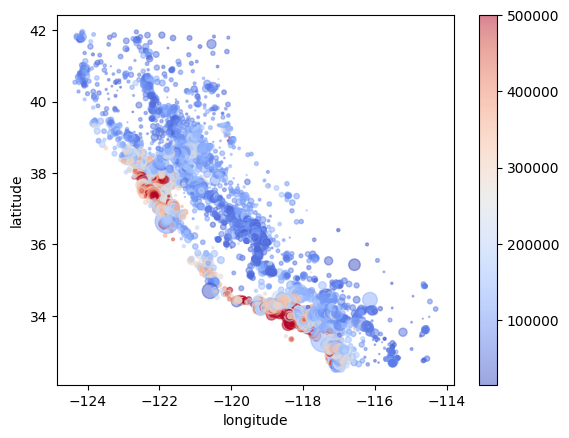

In [84]:
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing['population']/100, c=housing['median_house_value'], cmap='coolwarm', alpha=0.5);


#### Explore correlation between all continuous numeric variables using .corr() method.

In [85]:
# CODE HERE

In [86]:
numerical_columns = housing.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = housing[numerical_columns].corr()

correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


#### Use seaborn method to convert the correlation matrix to a heatmap plot
#### It's usually a better way to look for correlations among the features

In [87]:
# CODE HERE

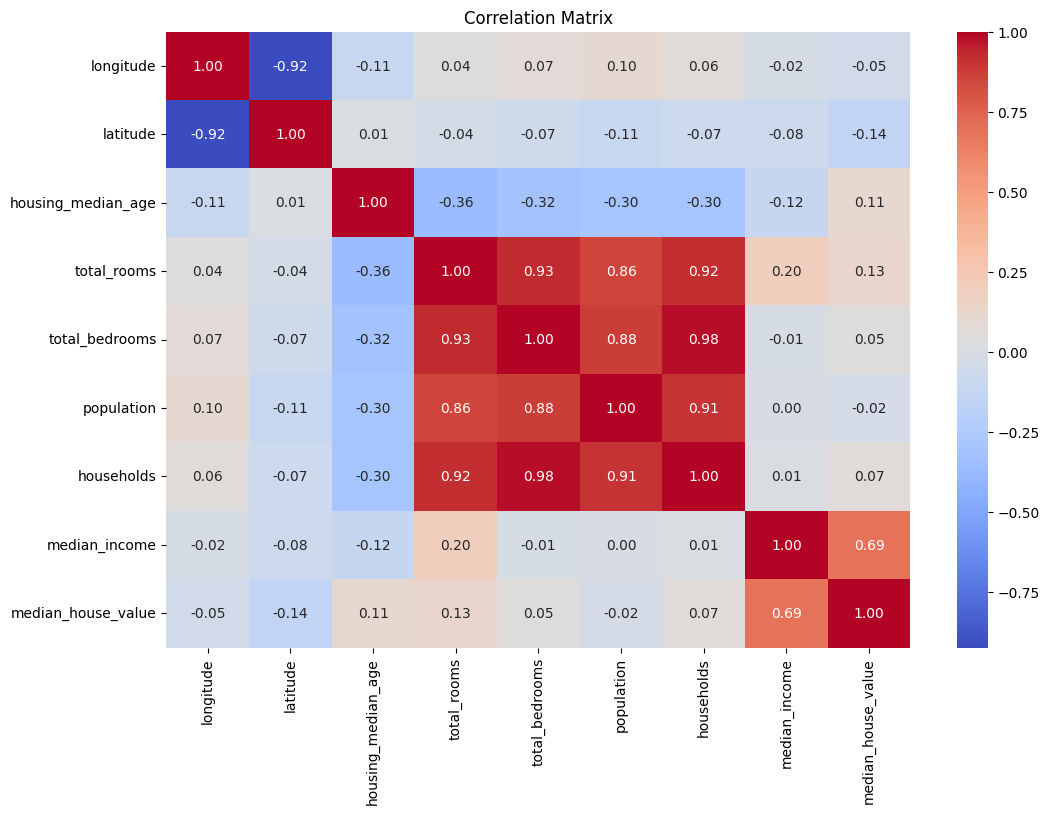

In [88]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Another way to check for correlation between attributes is to use the pandas scatter_matrix() function

In [89]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# CODE HERE

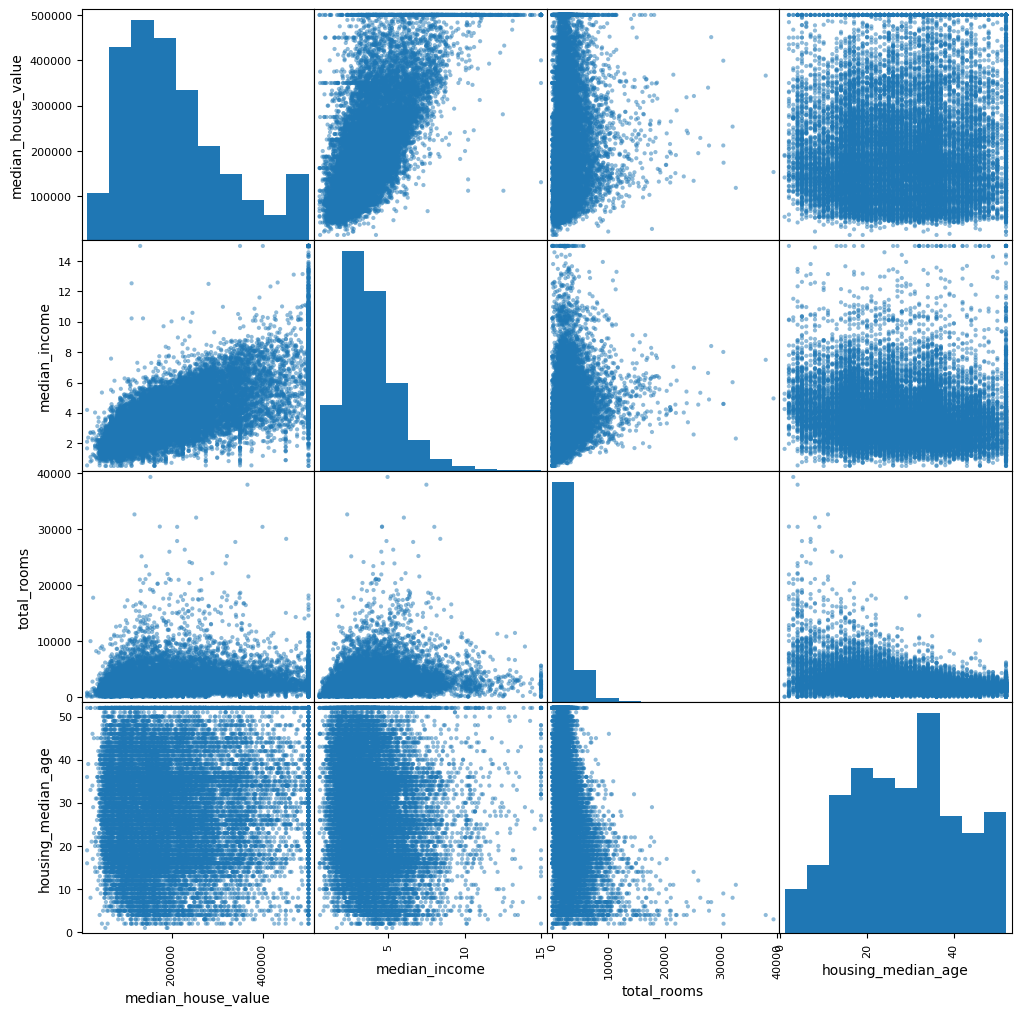

In [90]:
scatter_matrix(housing[attributes], figsize=(12, 12))
plt.show()

#### *CHALLENGE*
#### change the color of the plot based on ocean_proximity category
#### hint: use seaborn pairplot

In [91]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "ocean_proximity"]

In [92]:
# CODE HERE

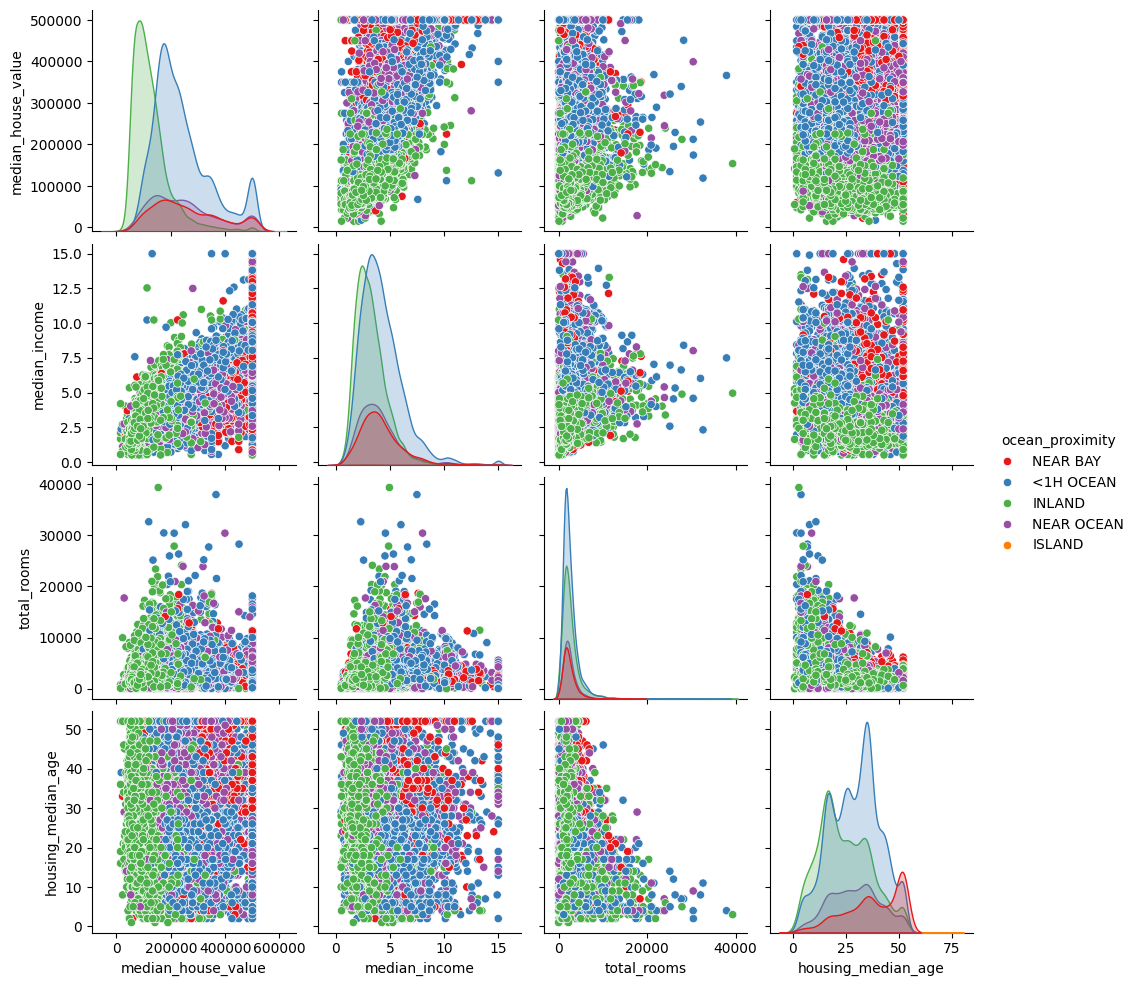

In [93]:
sns.pairplot(housing, vars=attributes[:4], hue=attributes[4], palette='Set1')
plt.show()

#### Create a scatter plot between median_income and median_house_value

In [94]:
# CODE HERE

<Axes: xlabel='median_income', ylabel='median_house_value'>

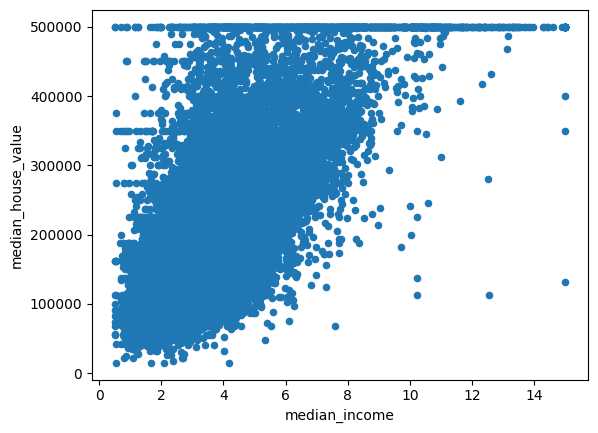

In [95]:
housing.plot(kind='scatter',x='median_income',y='median_house_value')

#### Create a boxplot to show the relation between median_house_value and the categorical feature ocean_proximity

In [96]:
# CODE HERE

<ipython-input-97-5cf9dbef08fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='median_house_value', y='ocean_proximity', data=housing, palette='Set1')


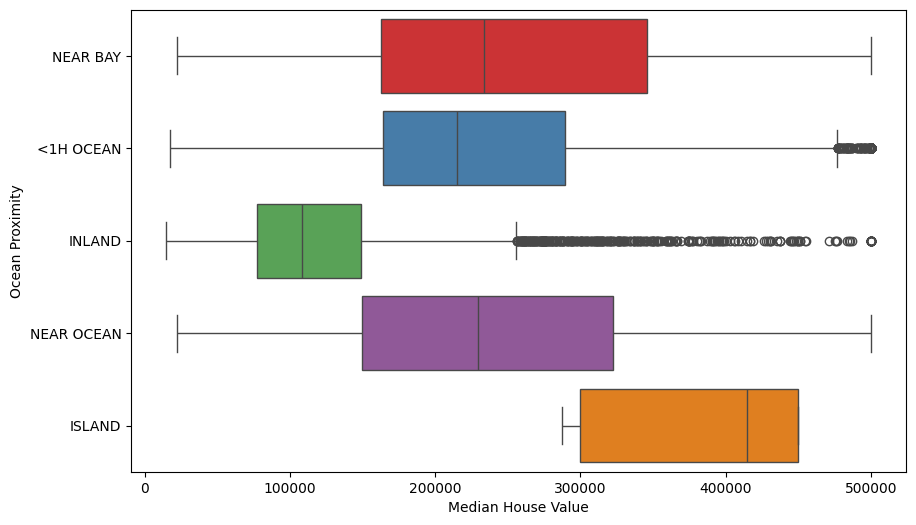

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='median_house_value', y='ocean_proximity', data=housing, palette='Set1')
plt.xlabel('Median House Value')
plt.ylabel('Ocean Proximity')
plt.show()

***
# 3- Prepare the data
***

## A- Data Cleaning

#### Create a Series that displays the total count of missing values per column.

In [98]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### the total_bedrooms attribute has some missing values. You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods:

#### Use the third option and fill the total_bedrooms null values with the median

In [99]:
# CODE HERE
median_total_bedrooms = housing['total_bedrooms'].median()

housing['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

housing['total_bedrooms'] = housing['total_bedrooms'].astype(float)

#### Check if there any zeros in dataframe.

In [100]:
(housing == 0).sum(axis=0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Great there aren't any zeros in the data.
#### Zeros may sometimes be missing values so we need to take a closer look at them

## B- Attribute Combinations

#### create new attribute called rooms_per_household between total_rooms and households

In [101]:
# CODE HERE
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

#### create new attribute called bedrooms_per_room between total_bedrooms and total_rooms

In [102]:
# CODE HERE
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

#### create new attribute called population_per_household between population and households

In [103]:
# CODE HERE
housing['population_per_household']=housing['population'] / housing['households']

#### Now let's look for correlation again

In [104]:
# CODE HERE
numerical_columns = housing.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = housing[numerical_columns].corr()
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

#### now let's remove old features("total_bedrooms", "total_rooms", "population", "households"), use drop method
#### Note: make inplace parameter True to save changes

In [105]:
# CODE HERE
#old_features = ["total_bedrooms", "total_rooms", "population", "households"]
#housing.drop(old_features,axis=1,inplace=True)

In [106]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## C- Handling Text and Categorical Attributes

#### We have 5 classes in ocean_proximity.
#### To handle this categorical feature we create housing_cat that contain ocean_proximity.

In [107]:
print(housing["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [108]:
housing_cat = housing[["ocean_proximity"]]

#### Now use sklearn OneHotEncoder to fit and transform housing_cat.

In [109]:
from sklearn.preprocessing import OneHotEncoder
onehot_encode = OneHotEncoder()
encoded_data = onehot_encode.fit_transform(housing_cat)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=onehot_encode.get_feature_names_out(['ocean_proximity']))

encoded_df.values

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## D- Feature Scaling

#### To scale numerical values we created housing_num that contain numerical values.
#### Now use sklearn StandardScaler to fit and transform housing_num.

In [110]:
from sklearn.preprocessing import StandardScaler
housing_num = housing.drop("ocean_proximity", axis=1)

# CODE HERE
scaler = StandardScaler()

scaled_data = scaler.fit_transform(housing_num)

scaled_df = pd.DataFrame(scaled_data, columns=housing_num.columns)


In [111]:
scaled_df.values

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -1.02998783, -0.04959654],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.8888972 , -0.09251223],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -1.29168566, -0.02584253],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
         0.02113407, -0.0717345 ],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
         0.09346655, -0.09122515],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
         0.11327519, -0.04368215]])

# Custom Transformers


####  Here is a small transformer class that adds the combined attributes wediscussed earlier:

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

#### Use the above class (CombinedAttributesAdder) to create instance called attr_reader, then transform housing values and save them in a variable called housing_extra_attribs.

In [115]:
# CODE HERE
attr_reader = CombinedAttributesAdder()
housing_extra_attribs = attr_reader.transform(housing.values)

In [116]:
print(housing_extra_attribs)

[[-122.23 37.88 41.0 ... 6.984126984126984 2.5555555555555554
  0.14659090909090908]
 [-122.22 37.86 21.0 ... 6.238137082601054 2.109841827768014
  0.15579659106916466]
 [-122.24 37.85 52.0 ... 8.288135593220339 2.8022598870056497
  0.12951601908657123]
 ...
 [-121.22 39.43 17.0 ... 5.20554272517321 2.325635103926097
  0.21517302573203195]
 [-121.32 39.43 18.0 ... 5.329512893982808 2.1232091690544412
  0.21989247311827956]
 [-121.24 39.37 16.0 ... 5.254716981132075 2.616981132075472
  0.22118491921005387]]


# Transformation Pipelines


In [117]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Create your own pipline for numerical attributes. It should contain SimpleImputer, CombinedAttributesAdder, and StandardScaler. call it num_pipeline.

In [118]:
# CODE HERE
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

#### now create a full pipeline called full_pipeline , use num_pipeline for numerical attributes  and OneHotEncoder for catigorcal attributes .

In [121]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


#### fit and transform full_pipeline with housing data then saved it in housing_prepared

In [125]:
# CODE HERE
housing_prepared = full_pipeline.fit_transform(housing)

In [126]:
print(housing_prepared[:5])

[[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97247648 -0.9744286
  -0.97703285  2.34476576  2.12963148  0.62855945 -1.02998783 -0.04959654
   0.62855945 -0.04959654 -1.02998783  0.          0.          0.
   1.          0.        ]
 [-1.32284391  1.04318455 -0.60701891  2.0458901   1.35714343  0.86143887
   1.66996103  2.33223796  1.31415614  0.32704136 -0.8888972  -0.09251223
   0.32704136 -0.09251223 -0.8888972   0.          0.          0.
   1.          0.        ]
 [-1.33282653  1.03850269  1.85618152 -0.53574589 -0.82702426 -0.82077735
  -0.84363692  1.7826994   1.25869341  1.15562047 -1.29168566 -0.02584253
   1.15562047 -0.02584253 -1.29168566  0.          0.          0.
   1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.62421459 -0.71972345 -0.76602806
  -0.73378144  0.93296751  1.16510007  0.15696608 -0.4496128  -0.0503293
   0.15696608 -0.0503293  -0.4496128   0.          0.          0.
   1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 

# 4- Create a Test Set and Train Set

#### Use model_selection.train_test_split from sklearn to split the data into training and testing sets.
#### Note: Set random_state=42 to get the same result

In [127]:
# CODE HERE
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### Let’s also separate the predictors and the labels to housing and housing_labels
#### (note that drop() creates a copy of the data and does not affect strat_train_set):

In [128]:
# CODE HERE
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

# Great Job!
# #shAI_Club